In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Support Vector Machines

SVM stands for "support vector machines". They are efficient and easy to use estimators. They come in two kinds: SVCs (Support Vector Classifiers) for classification, and SVRs (Support Vector Regressors) for regression.

### Linear SVMs

The SVM module contains `LinearSVC()`. Using `SVC(kernel = "linear")` will also yield a linear predictor different in minor technical aspects.

### Kernel SVMs

The power of SVMs lies in using *kernels*, which allow for non-linear decision boundaries. A kernal defines a similarity measuer between data points. 

Some common kernels:
* **linear** - will give a linear decision frontier. It is the most computationally efficient approach.
* **poly** - will give decision frontiers that are polynomial. The order given by the `order` argument.
* **rbf** - uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs controls the smoothness of the decision frontier. RBFs are the most flexible but require the most data.

Predictions in a kernel-SVM are made using the formula:

$$ \hat y = sign(\alpha_{0} + \Sigma_{j} \alpha_{j} y_{j} k(x^{(j)}, x)) $$

where $x^{(j)}$ are training samples, $y^{(j)}$ the corresponding labels, $x$ is a test-sample to predict on, $k$ is the kernel, and $\alpha$ are learned parameters.

The most important parameter of the SVM is the regularization parameter C, which bounds the influence of each individual sample:

* Low C values: many support vectors
* High C values: small number of support vectors

The other important parameters are in the kernel. Lets look at the RBF kernel in more detail:

$$ k(x, x') = exp(-\gamma || x - x' ||^{2})$$

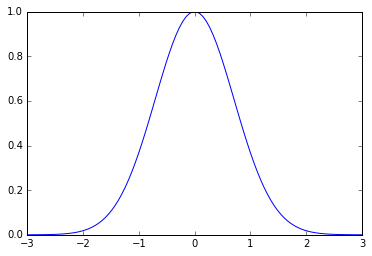

In [2]:
from sklearn.metrics.pairwise import rbf_kernel

line = np.linspace(-3, 3, 100)[:, np.newaxis]
kernel_value = rbf_kernel(line, [[0]], gamma=1)
plt.plot(line, kernel_value)

In [7]:
# %load figures/plot_2d_separator.py
import numpy as np
import matplotlib.pyplot as plt

global plot_2d_separator
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


#if __name__ == '__main__':
#    from sklearn.datasets import make_blobs
#    from sklearn.linear_model import LogisticRegression
#    X, y = make_blobs(centers=2, random_state=42)
#    clf = LogisticRegression().fit(X, y)
#    plot_2d_separator(clf, X, fill=True)
#    plt.scatter(X[:, 0], X[:, 1], c=y)
#    plt.show()

In [8]:
# %load figures/plot_svm_interactive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
#from .plot_2d_separator import plot_2d_separator


def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y


def plot_rbf_svm_parameters():
    X, y = make_handcrafted_dataset()

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for ax, C in zip(axes, [1e0, 5, 10, 100]):
        ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])

        svm = SVC(kernel='rbf', C=C).fit(X, y)
        plot_2d_separator(svm, X, ax=ax, eps=.5)
        ax.set_title("C = %f" % C)

    fig, axes = plt.subplots(1, 4, figsize=(15, 3))
    for ax, gamma in zip(axes, [0.1, .5, 1, 10]):
        ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])
        svm = SVC(gamma=gamma, kernel='rbf', C=1).fit(X, y)
        plot_2d_separator(svm, X, ax=ax, eps=.5)
        ax.set_title("gamma = %f" % gamma)


def plot_svm(log_C, log_gamma):
    X, y = make_handcrafted_dataset()
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    ax = plt.gca()
    plot_2d_separator(svm, X, ax=ax, eps=.5)
    # plot data
    ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])
    # plot support vectors
    sv = svm.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=230, facecolors='none', zorder=10, linewidth=3)
    ax.set_title("C = %.4f gamma = %.4f" % (C, gamma))


def plot_svm_interactive():
    from IPython.html.widgets import interactive, FloatSlider
    C_slider = FloatSlider(min=-3, max=3, step=.1, value=0, readout=False)
    gamma_slider = FloatSlider(min=-2, max=2, step=.1, value=0, readout=False)
    return interactive(plot_svm, log_C=C_slider, log_gamma=gamma_slider)
    


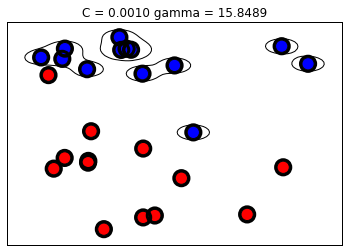

In [10]:
plot_svm_interactive()